In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import utils.dataloaders as dl
import utils.traintest as tt
import utils.adversarial as adv
import utils.models as models

reload(adv)

<module 'utils.adversarial' from '/home/alexm/project/notebooks/gmm-robust/utils/adversarial.py'>

In [2]:
file = 'SavedModels/base/base_CIFAR10_lr0.1_augm_flagTrue_train_typeCEDA_ACET_OUT_steps40.pth'
file = 'SavedModels/base/base_CIFAR10_lr0.1_augm_flagTrue_train_typeACET_OUT_steps40.pth'

device = torch.device('cuda:1')

model = torch.load(file).to(device)

In [3]:
test_loader = dl.CIFAR10(train=False)

In [4]:
data, label = next(iter(test_loader))
data = data.to(device)

In [7]:
x = torch.rand(20, 3, 32, 32, device=device)

In [29]:
xp = adv.gen_adv_sample(model, device, data, label, epsilon=0.1, steps=200, step_size=0.0001)

In [67]:
data, losses = adv.gen_adv_noise(model, device, x, epsilon=5., restarts=1, 
                                 perturb=False, steps=500, step_size=.1, norm='inf')

In [68]:
with torch.no_grad():
    out = model(data)
print(out.exp().max(1))
print(out.exp().max(1)[0].mean())

(tensor([0.1044, 0.9808, 0.1060, 0.1049, 0.1057, 0.1040, 0.1053, 0.1052, 0.9898,
        0.1047, 0.1059, 0.1057, 0.1051, 0.1058, 0.9900, 0.1051, 0.1051, 0.1061,
        0.1031, 0.9366], device='cuda:1'), tensor([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:1'))
tensor(0.2790, device='cuda:1')


In [58]:
with torch.no_grad():
    out = model(data)
print(out.exp().max(1))

(tensor([0.1035, 0.1071, 0.1048, 0.1039, 0.1042, 0.1034, 0.1043, 0.1041, 0.1043,
        0.1035, 0.1041, 0.1046, 0.1042, 0.1044, 0.1053, 0.1038, 0.1039, 0.1043,
        0.1029, 0.1051], device='cuda:1'), tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:1'))


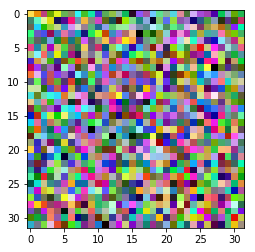

In [69]:
plt.imshow(data[1].detach().cpu().permute(1,2,0))

In [5]:
file = 'SavedModels/gmm__PCACIFAR10_lam0.0_n100_lr0.1_lrgmm1e-05_augm_flagTrue_train_typeCEDA_GMM_OUTgrad_vars mu var_OUT.pth'
ccu = torch.load(file).cpu()
gmm = ccu.mm.to(device)
shape = (3,32,32)

trans_matrix = gmm.metric.comp_vecs.t()
trans_matrix = torch.eye(3072).to(device)

pca = models.MyPCA(trans_matrix, 1.+0.*gmm.metric.singular_values, shape)

In [43]:
epsilon = torch.tensor(x.shape[0]*[5.], device=device)
data, losses = adv.gen_pca_noise(model, device, x.to(device), pca, epsilon, restarts=1, 
                                 perturb=False, steps=200, alpha=0.01)

with torch.no_grad():
    out = model(data)
print(out.exp().max(1))
print(out.exp().max(1)[0].mean())

(tensor([0.1046, 0.1066, 0.1066, 0.1060, 0.1064, 0.1048, 0.1074, 0.1059, 0.1059,
        0.1043, 0.1065, 0.1050, 0.1059, 0.1059, 0.1089, 0.1057, 0.1096, 0.1057,
        0.1043, 0.1061], device='cuda:1'), tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], device='cuda:1'))
tensor(0.1061, device='cuda:1')


In [64]:
data, losses = adv.gen_adv_noise(model, device, x, epsilon=0.1, restarts=5, 
                                 perturb=False, steps=500, step_size=0.01)

with torch.no_grad():
    out = model(data)
print(out.exp().max(1))

Parameter containing:
tensor([1660.7218, 1047.2676,  774.8707,  ...,    0.3064,    0.3064,
           0.3027], device='cuda:1')

In [27]:
print(out.exp().max(1)[0].mean())

tensor(0.1026, device='cuda:1')


In [14]:
reload(adv)

<module 'utils.adversarial' from '/home/alexm/project/notebooks/gmm-robust/utils/adversarial.py'>